# Autoencoders

In [1]:
#importing libraries
import numpy as np
import pandas as pd

from numpy import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import keras
from keras.models import Model
from keras.layers import Input, add
from keras.layers.core import Dense, Dropout, Activation, Flatten, Reshape
from tensorflow.keras.layers import LayerNormalization

In [2]:
#Generating data (value of constants), The value of the constants (a0,a1,n) are generated randomly.

A0=[] #empty list for a0
A1=[] #empty list for a
N=[] #empty list for n
for i in range(150): #generating 150 values for each constant in a specified range
    a0=np.random.uniform(70, 110)
    a1=np.random.uniform(1,20)
    n=np.random.uniform(1,5)
    A0.append(a0)
    A1.append(a1)
    N.append(n)
A0=np.reshape(A0,(150,1))
A1=np.reshape(A1,(150,1))
N=np.reshape(N,(150,1))

In [4]:
#Generating values of E using the equaion (E=a0+a1*x^n)

x=np.linspace(1,5,25)
d=[] #emplty list for storing the values of E

for i in range(150):
    E=A0[i]+(A1[i]*((x)**N[i]))
    d.append(E)
df= pd.DataFrame(d) #converting the array into DataFrame df (which now acts as an input)
df.shape

(150, 25)

In [5]:
#Splitting the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df,df,test_size=0.2)

In [6]:
print(X_train.shape)
print(X_test.shape)

(120, 25)
(30, 25)


In [7]:
col_num = X_train.shape[1] #No. of features
input_dim = Input(shape=(col_num,)) #Input
col_num

25

In [8]:
# Autoencoder Model
#Encoder layers
enc = Dense(128, activation="relu")(input_dim)
enc = Dense(64, activation="relu")(enc)
enc = Dense(32, activation="relu")(enc)

# latent space
latent_space = Dense(3)(enc)

#Decoder layers
dec = Dense(32, activation="relu")(latent_space)
dec = Dense(64, activation="relu")(dec)
dec = Dense(128, activation="relu")(dec)


dec = Dense(col_num, activation="relu")(dec)
# init model
autoencoder = Model(input_dim, dec)
# compile model
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='mape')
autoencoder.fit(X_train,X_train, epochs=500, batch_size=10)

Epoch 1/500
12/12 [==============================] - 1s 2ms/step - loss: 87.7940
Epoch 2/500
12/12 [==============================] - 0s 3ms/step - loss: 65.3398
Epoch 3/500
12/12 [==============================] - 0s 4ms/step - loss: 55.4429
Epoch 4/500
12/12 [==============================] - 0s 4ms/step - loss: 50.7003
Epoch 5/500
12/12 [==============================] - 0s 5ms/step - loss: 48.0120
Epoch 6/500
12/12 [==============================] - 0s 3ms/step - loss: 45.7542
Epoch 7/500
12/12 [==============================] - 0s 4ms/step - loss: 43.5906
Epoch 8/500
12/12 [==============================] - 0s 3ms/step - loss: 43.1170
Epoch 9/500
12/12 [==============================] - 0s 3ms/step - loss: 45.5295
Epoch 10/500
12/12 [==============================] - 0s 3ms/step - loss: 44.1342
Epoch 11/500
12/12 [==============================] - 0s 4ms/step - loss: 43.9092
Epoch 12/500
12/12 [==============================] - 0s 2ms/step - loss: 41.3757
Epoch 13/500
12/12 [=====

In [9]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 25)]              0         
                                                                 
 dense (Dense)               (None, 128)               3328      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 3)                 99        
                                                                 
 dense_4 (Dense)             (None, 32)                128       
                                                                 
 dense_5 (Dense)             (None, 64)                2112  

In [10]:
#encoder part
#Use Encoder level to reduce dimension of train and test data

encoder = Model(input_dim, latent_space)

In [11]:
#Extract features from the latent space and checking its shape
encoded_test= encoder.predict(X_test)
print(encoded_test.shape)

encoded_train= encoder.predict(X_train)
print(encoded_train.shape)

1/1 [==============================] - 0s 172ms/step
(30, 3)
4/4 [==============================] - 0s 4ms/step
(120, 3)


Here, we can see that the dimension is reduced.

In order to check whether the above data obtained from the encoder is correct or not, we check by plotting the input and output of the autoencoder model for both tets and train data.

In [12]:
# getting the prediction of the train data
m=[]
for i in range(120):
    b=X_train.iloc[i]
    b=b.values.reshape(1,25)
    y_=autoencoder.predict(b)
    b=b.reshape(25,)
    y_=y_.reshape(25,)
    m.append(y_)
data3= pd.DataFrame(m)
print(data3.shape)
#data3 here represents the dataframe where all the predicted values of X_train is stored

1/1 [==============================] - 0s 24ms/step
(120, 25)


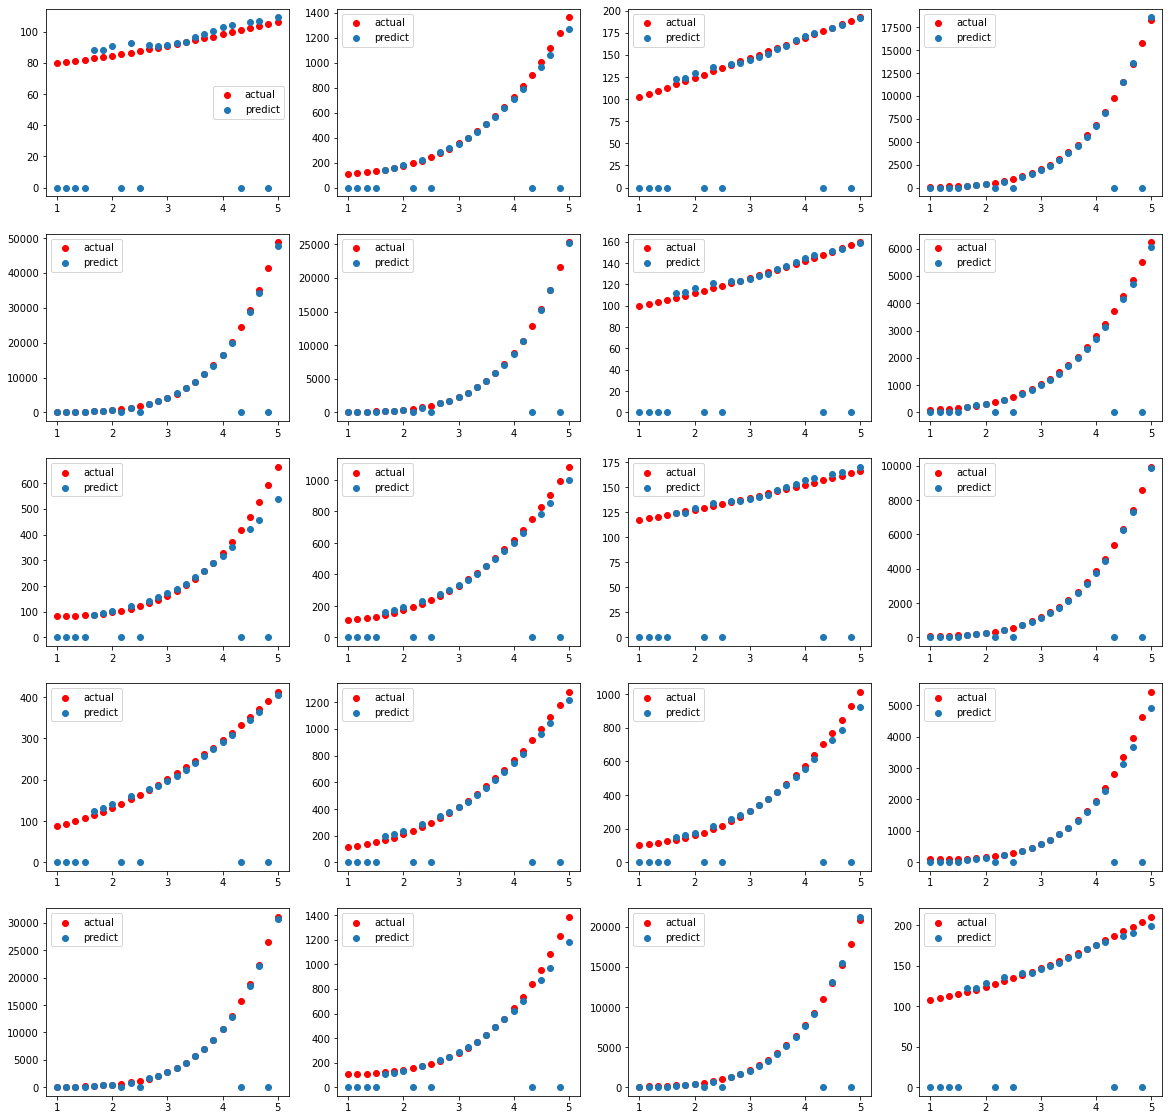

In [13]:
#train plots
import matplotlib.pyplot as plt

# Create a figure with 4 rows and 5 columns of subplots
fig, axs = plt.subplots(5,4, figsize=(20, 20))

# Flatten the 2D array of subplots to a 1D array
axs = axs.ravel()

for i in range(20):
    # Create a scatter plot in the current subplot
    axs[i].scatter(x, X_train.iloc[i], color='r')
    axs[i].scatter(x, data3.iloc[i])
    axs[i].legend(['actual', 'predict'])
plt.show()

Here, it is observed that the graph of the actual and predicted value nearly overlaps. Hence, for training data we can say that the output is same as the input.

In [14]:
#test data
p=[]
for i in range(30):
    a=X_test.iloc[i]
    a=a.values.reshape(1,25)
    y_=autoencoder.predict(a)
    a=a.reshape(25,)
    y_=y_.reshape(25,)
    p.append(y_)
data2= pd.DataFrame(p)
#data2 here represents the dataframe where all the predicted values of X_train is stored

1/1 [==============================] - 0s 32ms/step


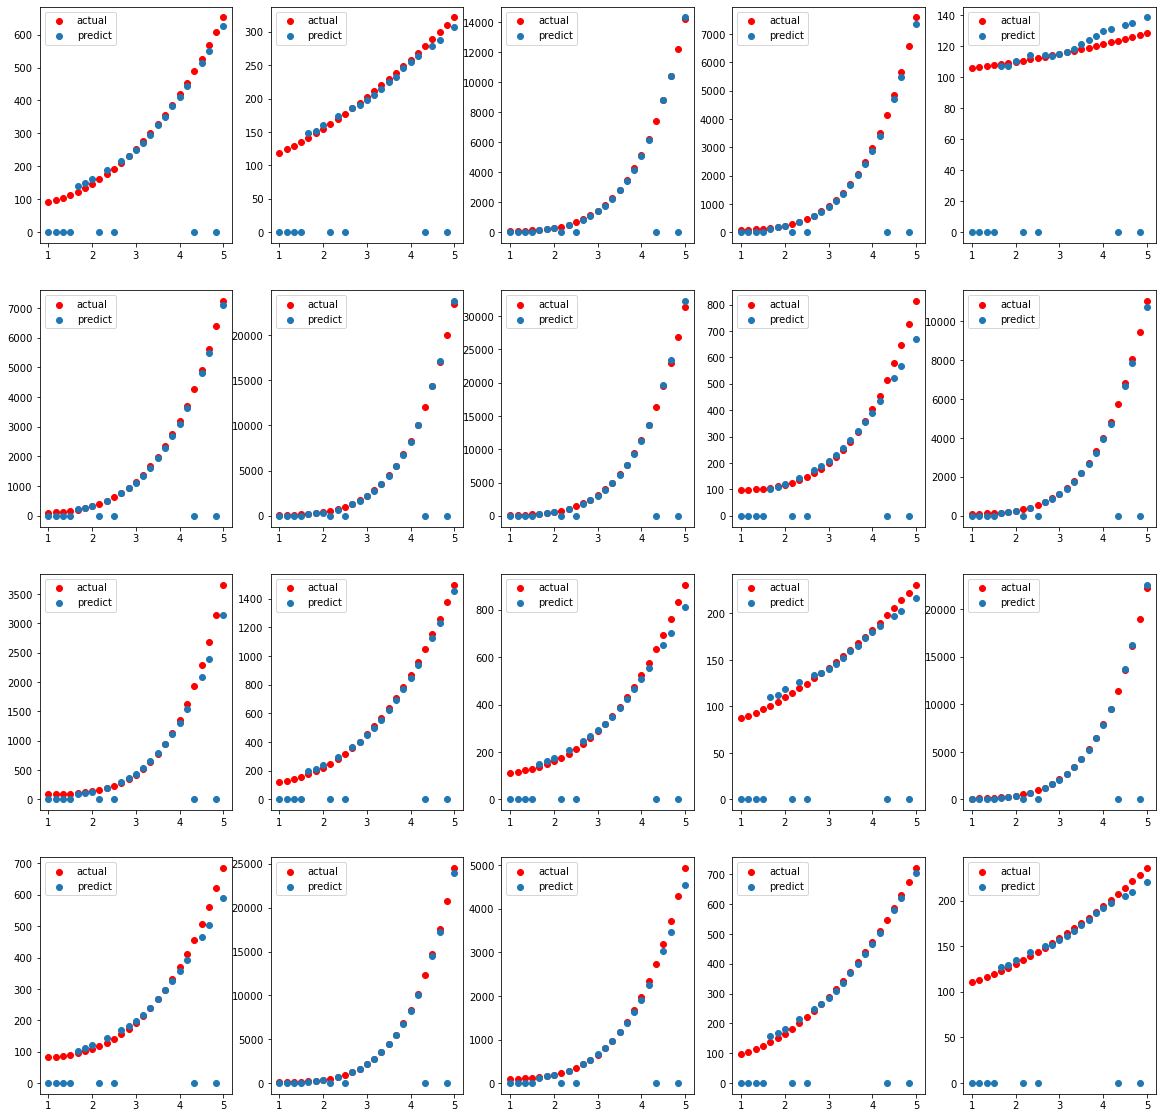

In [15]:
#test plots
import matplotlib.pyplot as plt

# Create a figure with 5 rows and 4 columns of subplots
fig, axs = plt.subplots(4, 5, figsize=(20, 20))

# Flatten the 2D array of subplots to a 1D array
axs = axs.ravel()

for i in range(20):
    # Create a scatter plot in the current subplot
    axs[i].scatter(x, X_test.iloc[i], color='r')
    axs[i].scatter(x, data2.iloc[i])
    axs[i].legend(['actual', 'predict'])
plt.show()

Similarlly, for the test data the graph of the actual and predicted value are nearly same. Hence, the output is same as the input for the test data also.
Therefore, we can say that the input is same as the output for autoencoders.